In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [66]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df = df.dropna()

In [68]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X.shape

(150, 4)

In [71]:
#normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [75]:
sim_inp = Input(shape = (4,))
encoded_sim = Dense(2, activation='relu',name='Encoded')(sim_inp)
decoded_sim = Dense(4,activation='sigmoid',name='Decoded')(encoded_sim)

ae_simple = Model(sim_inp,decoded_sim)
encoder = Model(sim_inp,encoded_sim)
ae_simple.compile(optimizer='adam',loss='mse')
ae_simple.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoded (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoded (Dense)                      │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = ae_simple.fit(X_norm,X_norm,epochs=50,batch_size=36,shuffle='True',verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0637
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0634
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0631
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0629 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0626
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0623 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0620
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0617 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0614 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0611 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0608
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0605
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0602
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0598
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0595 
Epoch 16/50
5/5 ━━━━━━━━━━━━

In [79]:
encoded_data = encoder.predict(X_norm,verbose=1)
encoded_data

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.09914851],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.06684509],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.102299  ],
       [0.        , 0.12809545],
       [0.        , 0.02290377],
       [0.        , 0.        ],
       [0.        , 0.17350695],
       [0.        , 0.        ],
       [0.        , 0.10759526],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.03092164],
       [0.        , 0.00281978],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.02096432],
       [0.        , 0.0027791 ],
       [0.        , 0.        ],
       [0.

In [92]:
decoder = ae_simple.predict(X_norm,verbose=1)
decoder[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.3984588 , 0.4762976 , 0.4507326 , 0.43943337],
       [0.3984588 , 0.4762976 , 0.4507326 , 0.43943337],
       [0.3984588 , 0.4762976 , 0.4507326 , 0.43943337],
       [0.3984588 , 0.4762976 , 0.4507326 , 0.43943337],
       [0.3984588 , 0.4762976 , 0.4507326 , 0.43943337]], dtype=float32)

C:\Users\Parth\AppData\Local\Temp\ipykernel_17424\336986964.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1],c=y, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
C:\Users\Parth\AppData\Local\Temp\ipykernel_17424\336986964.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1],c=y, cmap='viridis', s=50, alpha=0.7, edgecolors='black')


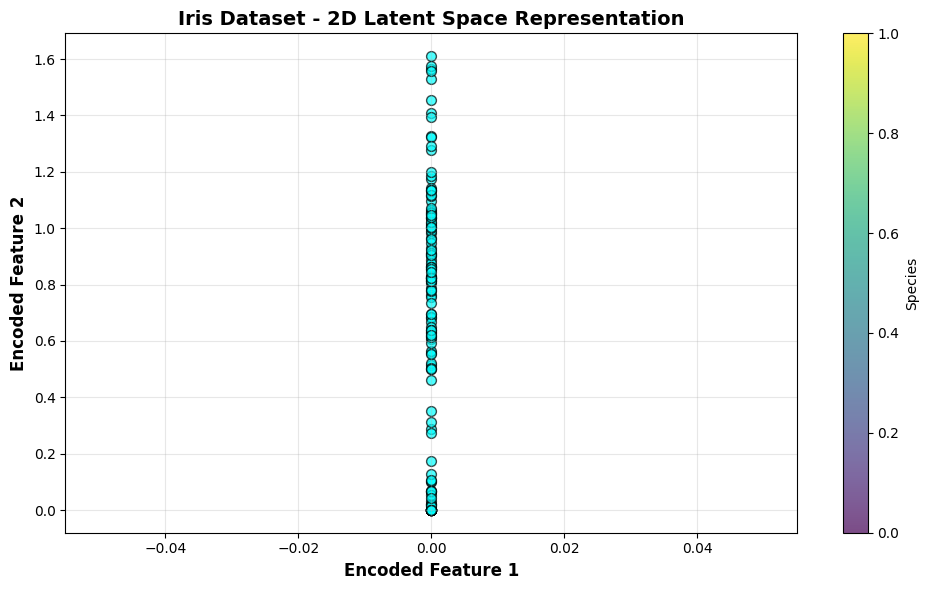

In [93]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1],c=y, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
plt.colorbar(scatter, label='Species')
plt.xlabel('Encoded Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Encoded Feature 2', fontsize=12, fontweight='bold')
plt.title('Iris Dataset - 2D Latent Space Representation', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
     

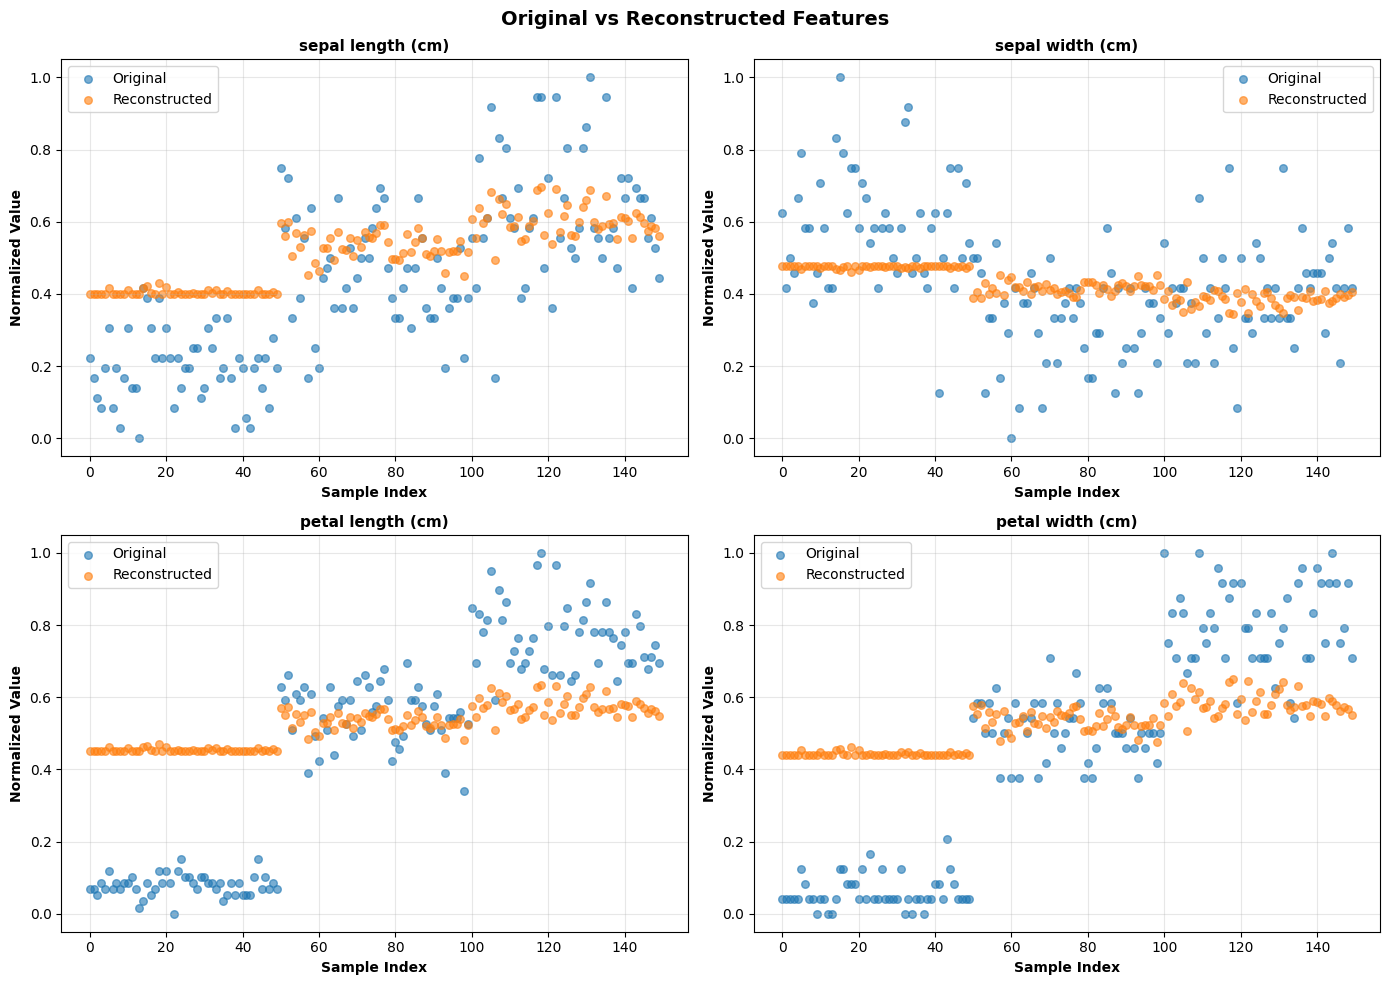

In [95]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
feature_names = iris.feature_names

for i, ax in enumerate(axes.flat):
    ax.scatter(range(len(X_norm)), X_norm[:, i],
              label='Original', alpha=0.6, s=30)
    ax.scatter(range(len(decoder)), decoder[:, i],
              label='Reconstructed', alpha=0.6, s=30)
    ax.set_xlabel('Sample Index', fontsize=10, fontweight='bold')
    ax.set_ylabel('Normalized Value', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature_names[i]}', fontsize=11, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Original vs Reconstructed Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Mean Squared Error : 0.04797431064960227
Mean Squared Error for reconstruction : 0.04797431064960227


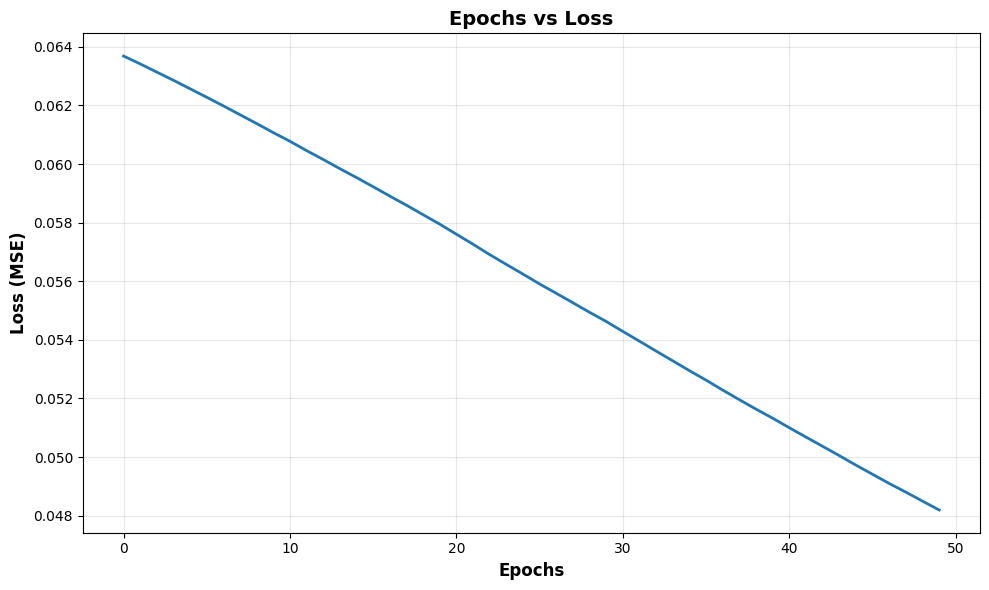

In [99]:
mse = np.mean((X_norm - decoder) ** 2)
print(f"Mean Squared Error : {mse}")
sample_error = np.mean((X_norm - decoder) ** 2,axis=1)
print(f"Mean Squared Error for reconstruction : {mse}")
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],linewidth=2)
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss (MSE)',fontsize=12,fontweight='bold')
plt.title('Epochs vs Loss',fontsize=14,fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()